In [1]:
import random
import copy

$y=mx+c$

== Sol ==
m = 0.8196180277900926
c = -1.5999109614307598


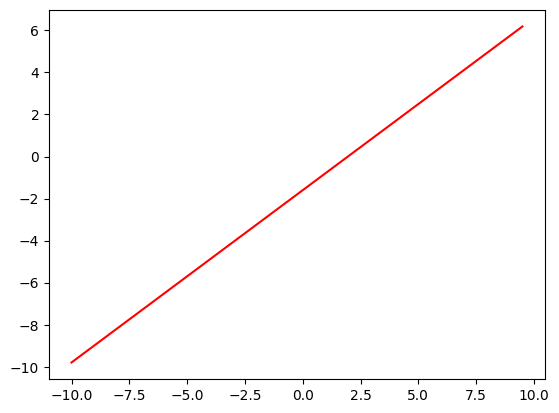

In [5]:
import matplotlib.pyplot as plt
import numpy as np

m_sol = random.random()*5-2.5
c_sol = random.random()*5-2.5
print('== Sol ==')
print('m =',m_sol)
print('c =',c_sol)

x=np.arange(-10, 10, 0.5)
y=m_sol*x + c_sol

plt.plot(x,y,'r')

# Extra

[[0.84073935 0.92899752]
 [0.29427569 0.66202952]
 [0.64356879 0.27400079]
 [0.41827618 0.85418539]
 [0.26201731 0.81505427]
 [0.10838677 0.11066528]
 [0.33800885 0.26717129]
 [0.91157927 0.44762463]
 [0.94864938 0.05666468]
 [0.34960642 0.66242108]
 [0.83438123 0.1218587 ]
 [0.62373495 0.17594918]
 [0.50303825 0.68439132]
 [0.30196836 0.0564358 ]
 [0.14981346 0.21837781]
 [0.56898706 0.92176056]
 [0.53901518 0.97023587]
 [0.21700453 0.35499964]
 [0.0210709  0.26420271]
 [0.07219802 0.75756881]]
---------------------------------------
[0.84073935 0.29427569 0.64356879 0.41827618 0.26201731 0.10838677
 0.33800885 0.91157927 0.94864938 0.34960642 0.83438123 0.62373495
 0.50303825 0.30196836 0.14981346 0.56898706 0.53901518 0.21700453
 0.0210709  0.07219802]
---------------------------------------
[-0.92103311 -1.36892457 -1.08263766 -1.26729154 -1.39536412 -1.52128249
 -1.33308009 -0.86297143 -0.8325881  -1.32357451 -0.92624434 -1.09889383
 -1.19781902 -1.36261952 -1.48732842 -1.14376619

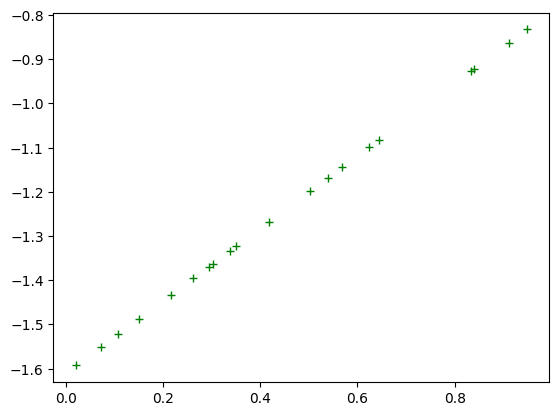

In [17]:
import random
Data = np.random.rand(20,2)
print(Data)
print("---------------------------------------")
print(Data[:, 0]) #เอาทุกแถว แต่เป็นคอลัมน์แรก ---> ค่า x

Data[:, 1]  =  m_sol*Data[:, 0] + c_sol+ (random.random()/10-0.05)
print("---------------------------------------")
print(Data[:, 1]) #---> ค่า y

plt.plot(Data[:,0],Data[:,1], 'g+')

# GA to Fit Curve mx+c

Try to fit `y=mx+c`

population:

[m1,c1]
[m2,c2]

In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
#สำหรับการสร้างเส้นทำนายจริง
m_sol = random.random()*10 - 5
c_sol  = random.random()*10 - 5
m_sol, c_sol

(-2.3995521494388514, -2.207612245808115)

In [25]:
def mutation(population):
  mutated = []
  #population = [[a, b], [c, d]]
  for pop in population:
    p = random.random()
    if p > 0.5:
      mutated.append( [pop[0] + random.random()*5- 2.5, pop[1]] )
    else:
      mutated.append( [pop[0], pop[1] + random.random()*5-2.5] )
  return mutated
#----------------------------------------------------------------------
def cross_over(population):  #population = [[a, b], [c, d]] --> cross_over ; [[a, d], [c, b]]
  return [[population[0][0], population[1][1]], [population[1][0], population[0][1]]]
#----------------------------------------------------------------------
def fitness(param, n):
  m            = param[0]
  c             = param[1]
  xs           = [random.random()*10 - 5 for i in range(5)]
  ys_hat     = np.array([m*xs[i] + c for i in range(5)])
  ys_actual = np.array([m_sol*xs[i] + c_sol for i in range(5)])
  return (ys_hat - ys_actual).dot((ys_hat - ys_actual).T) #sigma (Error)^2 = SSE
#----------------------------------------------------------------------
def selection(population, n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population   = unique_pop
  find_fitness = [(fitness(pop, n), pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0], [p for f, p in find_fitness[:2]]
#----------------------------------------------------------------------
def is_better(p1, p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False
#----------------------------------------------------------------------
def show_pop(population):
  for pop in population:
    print(pop)

In [29]:
n = 2

population = [[int(random.random()*10-5) for i in range(n)]]
#print(population)
population += [[int(random.random()*10-5) for i in range(n)]]
print(population)

mutated = mutation(population)
print(mutated)

crossovered = cross_over(population)
print(crossovered)

[[3, -3], [-3, 4]]
[[3, -2.22506918993904], [-1.7005038280198512, 4]]
[[3, 4], [-3, -3]]


In [33]:
n = 2

for i in range(30): # ทำ 30 ครั้ง
  population   = [[random.random()*2*n - n for i in range(n)]]
  population += [[random.random()*2*n - n for i in range(n)]]

  print('Start')
  print(population)
  print('===================')
  best_found = tuple() #best_found = tuple()

  for i in range(100000):
    mutated                   = mutation(population)
    cross_overed            = cross_over(population)
    best_pop, population = selection(population + mutated + cross_overed, n)

    if is_better(best_pop, best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1], n) <= 1e-5:
      print('Found at generation', i)
      break

    if i % 1000 == 0:
      print(i, best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[-1.63987584141484, 0.026829006948872358], [-1.0300772517041654, 0.9300349141625905]]
0 (17.674343349803497, [-1.63987584141484, 0.9300349141625905])

1000 (8.249734889796583e-06, [-2.397484464729203, -2.2160968786203226])

Found at generation 1479
=====
(4.7079125260120755e-06, [-2.4002919137059733, -2.204698985951051])

Start
[[1.8153384634284833, -1.6331008873771724], [0.5942692122190172, 0.9677496893990303]]
0 (340.6033081608784, [0.5942692122190172, -1.0105151266478194])

Found at generation 641
=====
(3.6496489463502626e-06, [-2.3992110271566247, -2.207451229994168])

Start
[[0.8793859682108569, -1.521799747055581], [0.8130504552541673, 0.2536278823228937]]
0 (199.5940414187245, [0.8793859682108569, 0.2536278823228937])

1000 (7.723626065968914e-05, [-2.4045525850973104, -2.222259653933239])

2000 (1.6313512843883914e-05, [-2.395538155993888, -2.2044780924495355])

3000 (1.4504073110674106e-05, [-2.396790352497618, -2.2168834655175984])

Found at generation 3528
=====
(1.3

# GA to Fit Curve $ax^2+bx+c $

ให้นิสิตแก้โปรแกรมเพื่อให้รองรับสมการกำลังสอง $ax^2+bx+c$

Try to fit $y=ax^2+bx+c$

population:

[a,b,c]
[a,b,c]

In [309]:
a_sol=random.random()*5-2.5
b_sol=random.random()*10-5
c_sol=random.random()*10-5

print('== Sol ==')
print('a =', a_sol)
print('b =', b_sol)
print('c =', c_sol)

== Sol ==
a = -0.4407493657699386
b = -0.3797542453516636
c = -2.0479859427533285


## GA Algorithm

In [310]:
def mutation(population):
    mutated = []
    for pop in population:
        # ตรวจสอบว่า pop มี 3 พารามิเตอร์ก่อนทำ mutation
        if len(pop) != 3:
            continue

        param_to_mutate = random.randint(0, 2)
        new_pop = pop.copy()
        # ปรับค่า mutation ให้เหมาะสมกับช่วงของ a, b, c
        if param_to_mutate == 0:  # mutate a
            new_pop[param_to_mutate] += (random.random() * 5 - 2.5) * mutation_rate
        else:  # mutate b หรือ c
            new_pop[param_to_mutate] += (random.random() * 10 - 5) * mutation_rate
        mutated.append(new_pop)
    return mutated
#--------------------------------------------------------------------------------------------------------
def cross_over(population):
    # ตรวจสอบว่า population มี 2 solutions และแต่ละ solution มี 3 ค่า
    if len(population) != 2 or any(len(sol) != 3 for sol in population):
        return []

    # ทำ crossover แบบสลับค่า b และ c
    return [[population[0][0], population[1][1], population[1][2]],
            [population[1][0], population[0][1], population[0][2]]]
#--------------------------------------------------------------------------------------------------------
def fitness(param, n):
    a, b, c     = param[0], param[1], param[2]
    xs           = [random.random() * 10 - 5 for i in range(5)]
    ys_hat     = np.array([a * x**2 + b * x + c for x in xs])
    ys_actual = np.array([a_sol * x**2 + b_sol * x + c_sol for x in xs])
    sse = np.sum(np.square(ys_hat - ys_actual))
    return sse  # คืนค่า SSE โดยตรง
#--------------------------------------------------------------------------------------------------------
def selection(population, n):
     unique_pop = []
     for pop in population:
         if pop not in unique_pop:
            unique_pop.append(pop)

    # สร้างสำเนาเพื่อไม่ให้แก้ไข population เดิม
     selected_pop = unique_pop.copy()

    # เรียง population จากน้อยไปมาก
     find_fitness = [(fitness(pop, n), pop) for pop in selected_pop]
     find_fitness.sort()

     if not find_fitness:
        # สร้าง initial population ใหม่ หรือ handle error ตามความเหมาะสม
        new_population = [[random.random()*10 - 5 for i in range(3)] for i in range(n)]
        return selection(new_population, n)  # เรียก selection ซ้ำกับ population ใหม่

     return find_fitness[0], [p for f, p in find_fitness[:2]]
#--------------------------------------------------------------------------------------------------------
def is_better(p1, p2):
    if not p2 or p1[0] < p2[0]:  # เปลี่ยนจาก <= เป็น <
        return True
    return False
#--------------------------------------------------------------------------------------------------------
def show_pop(population):
  for pop in population:
    print(pop)

## Parameter

In [332]:
num_generations = 100000
maximum_error = 10**-4

a_sol=random.random()*5-2.5
b_sol=random.random()*10-5
c_sol=random.random()*10-5

In [333]:
n = 3
population   = [[random.random()*10 - 5 for i in range(3)] for i in range(n)]
population += [[random.random()*10 - 5 for i in range(3)] for i in range(n)]

# เริ่มต้นกระบวนการ GA
best_found             = (float('inf'), [])
best_fitness_history = []

for i in range(num_generations):
    #print("Generation:", i)
    #print("Population:", population)
    #print("Mutated:", mutated)
    #print("Crossovered:", crossovered)
    #print("Best pop:", best_pop)
    #print("Best found:", best_found)
    #print("----")

    mutated      = mutation(population)
    crossovered = []

    while len(crossovered) < len(population) // 2:
        parents   = random.sample(population, 2)
        offspring = cross_over(parents)
        crossovered.extend(offspring)

    best_pop, population = selection(population + mutated + crossovered, n)
    #print("Best pop:", best_pop)
    #print("Population:", population)

    # คำนวณ fitness ของ best_pop และเก็บไว้ใน history
    best_fitness = fitness(best_pop[1], n)
    #print("Best fitness:", best_fitness)
    best_fitness_history.append(best_fitness)
    #print(is_better(best_pop, best_found))

    if is_better(best_pop, best_found):
        #print(best_pop)
        best_found = best_pop

    # show_pop(population)  # ถ้าต้องการแสดง population ในแต่ละ generation
    #print(best_found[1])

    if fitness(best_found[1],  n) <= maximum_error:
        print('Found at generation', i)
        print(f"Best parameters: a = {best_found[1][0]}, b = {best_found[1][1]}, c = {best_found[1][2]}")
        print(f"Exact solution: a = {a_sol}, b = {b_sol}, c = {c_sol}")
        break

    if i % 1000 == 0:
        print(f"Iteration {i}: {best_found}")
        print()

print('============')
print(best_found)
print()

Iteration 0: (562.7800897672965, [-3.7167643712955667, -2.2732392445434657, -1.8998150368616038])

Iteration 1000: (0.0006899455013988025, [-0.4509673231411464, 4.255269811962089, -4.81211007013893])

Found at generation 1664
Best parameters: a = -0.44927834135990613, b = 4.255269811962089, c = -4.843877389796784
Exact solution: a = -0.4476848178290327, b = 4.258150013847512, c = -4.848244612804779
(3.0665904436612984e-05, [-0.44927834135990613, 4.255269811962089, -4.843877389796784])



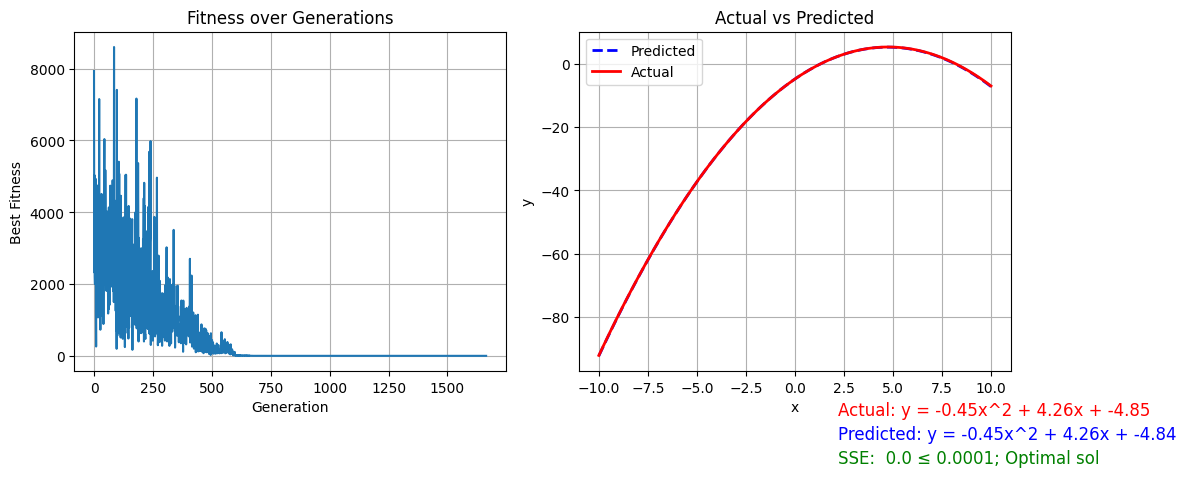

In [334]:
# หลังจากหา best solution แล้ว
x                = np.linspace(-10, 10, 100)
predicted_y = best_found[1][0] * x**2 + best_found[1][1] * x + best_found[1][2]
actual_y     = a_sol * x**2 + b_sol * x + c_sol

# สร้าง figure และ axes สำหรับ subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 แถว 2 คอลัมน์, ปรับขนาดตามต้องการ

# plot กราฟ fitness ใน subplot แรก
axes[0].plot(best_fitness_history[:i+1])
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Best Fitness')
axes[0].set_title('Fitness over Generations')
axes[0].grid(True)

# plot กราฟเปรียบเทียบค่าจริงและค่าทำนาย พร้อม standard error ใน subplot ที่สอง
axes[1].plot(x, predicted_y, label='Predicted', color='blue', linestyle='--', linewidth=2)
axes[1].plot(x, actual_y, label='Actual', color='red', linewidth=2)

# สร้าง Caption
axes[1].text(0.6, -0.13, f'Actual: y = {a_sol:.2f}x^2 + {b_sol:.2f}x + {c_sol:.2f}'
                  , transform=plt.gca().transAxes, fontsize=12, color='red')
axes[1].text(0.6, -0.20, f'Predicted: y = {best_found[1][0]:.2f}x^2 + {best_found[1][1]:.2f}x + {best_found[1][2]:.2f}'
                  , transform=plt.gca().transAxes, fontsize=12, color='blue')

if(round(best_found[0], 4) > round(maximum_error, 4)):
  axes[1].text(0.6, -0.27, f'SSE:  {round(best_found[0], 4)} > {round(maximum_error, 4)}; Alternative sol'
                  , transform=plt.gca().transAxes, fontsize=12, color='green')
else:
  axes[1].text(0.6, -0.27, f'SSE:  {round(best_found[0], 4)} ≤ {round(maximum_error, 4)}; Optimal sol'
                  , transform=plt.gca().transAxes, fontsize=12, color='green')

# Labels
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Actual vs Predicted')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()  # ปรับระยะห่างระหว่าง subplot
plt.show()

# Covid19 Thailand (12 Aug 21-25 Oct 21)

In [253]:
! wget https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv

--2024-09-02 18:42:25--  https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/026c8d31-0d51-49b7-9dc2-8373e7cef440/download/confirmed-cases-since-120864.csv
Resolving data.go.th (data.go.th)... 202.139.198.29
Connecting to data.go.th (data.go.th)|202.139.198.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228072402 (218M) [text/csv]
Saving to: ‘confirmed-cases-since-120864.csv’

confirmed-cases-sin 100%[===================>] 217.51M  13.8MB/s    in 18s     

2024-09-02 18:42:44 (12.4 MB/s) - ‘confirmed-cases-since-120864.csv’ saved [228072402/228072402]



In [255]:
import pandas as pd

df=pd.read_csv('confirmed-cases-since-120864.csv')
df

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,816990,12/8/2021,11/8/2021,ชาย,7.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
1,816991,12/8/2021,11/8/2021,ชาย,1.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
2,816992,12/8/2021,11/8/2021,ชาย,35.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
3,816993,12/8/2021,11/8/2021,หญิง,33.0,ปี,Thailand,เชียงราย,อื่นๆ,NaN,NaN
4,816994,12/8/2021,11/8/2021,หญิง,14.0,ปี,Thailand,เชียงราย,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1042163,1859153,25/10/2021,24/10/2021,ชาย,45.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1042164,1859154,25/10/2021,24/10/2021,ชาย,31.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1042165,1859155,25/10/2021,24/10/2021,ชาย,31.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN
1042166,1859156,25/10/2021,24/10/2021,ชาย,24.0,ปี,NaN,กรุงเทพมหานคร,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [256]:
df.groupby('announce_date').count()['No.']

,No.
announce_date,
1/10/2021,11754
1/9/2021,14802
10/10/2021,10817
10/9/2021,14403
11/10/2021,10035
...,...
7/9/2021,13821
8/10/2021,11140
8/9/2021,14176


In [257]:
df['announce_date'].unique()

array(['12/8/2021', '13/8/2021', '14/8/2021', '15/8/2021', '16/8/2021',
       '17/8/2021', '18/8/2021', '19/8/2021', '20/8/2021', '21/8/2021',
       '22/8/2021', '23/8/2021', '24/8/2021', '25/8/2021', '26/8/2021',
       '27/8/2021', '28/8/2021', '29/8/2021', '30/8/2021', '31/8/2021',
       '1/9/2021', '2/9/2021', '3/9/2021', '4/9/2021', '5/9/2021',
       '6/9/2021', '7/9/2021', '8/9/2021', '9/9/2021', '10/9/2021',
       '11/9/2021', '12/9/2021', '13/9/2021', '14/9/2021', '15/9/2021',
       '16/9/2021', '17/9/2021', '18/9/2021', '19/9/2021', '20/9/2021',
       '21/9/2021', '22/9/2021', '23/9/2021', '24/9/2021', '25/9/2021',
       '26/9/2021', '27/9/2021', '28/9/2021', '29/9/2021', '30/9/2021',
       '1/10/2021', '2/10/2021', '3/10/2021', '4/10/2021', '5/10/2021',
       '6/10/2021', '7/10/2021', '8/10/2021', '9/10/2021', '10/10/2021',
       '11/10/2021', '12/10/2021', '13/10/2021', '14/10/2021',
       '15/10/2021', '16/10/2021', '17/10/2021', '18/10/2021',
       '19/10/2021

In [258]:
import numpy as np

days=25
df['announce_date']=pd.to_datetime(df['announce_date'],dayfirst=True)
cc=np.array(df.groupby('announce_date').count()['No.'][-days:])
dd=[i for i in range(1,days+1)]

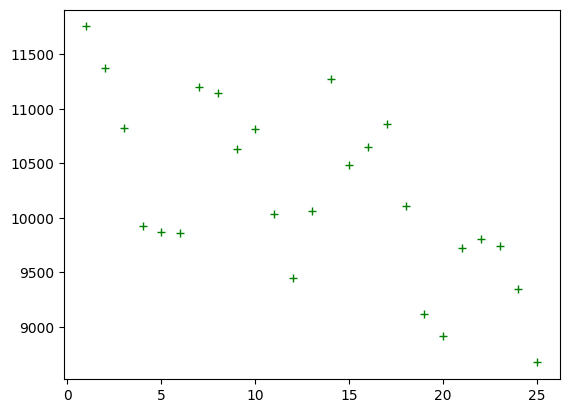

In [259]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(dd,cc,'g+')

In [260]:
def mutation(population):
  mutated = []
  for pop in population:
    ind=[0,1,2,3,4,5]
    i=random.choice(ind)
    new_pop=list(pop)
    new_pop[i] = new_pop[i]+random.random()*10-5
    mutated.append(new_pop)
  return mutated

def cross_over(population):
  ind=[0,1,2,3,4]
  i=random.choice(ind)
  return [population[0][:i+1]+population[1][i+1:],population[1][:i+1]+population[0][i+1:]]

def fitness(param,n):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  ys_actual = cc
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [261]:
import random
n = 6

population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[0.34020328627782837, 0.49418963117266745, 0.6095411781943599, 0.8024486139250638, 0.9553656058124148, 0.47929018241341237], [0.02827154607045823, 0.9026231552861359, 0.5792138680813202, 0.532122391109129, 0.20113115727753372, 0.9954365458360837]]
[[3.187443573797646, 0.49418963117266745, 0.6095411781943599, 0.8024486139250638, 0.9553656058124148, 0.47929018241341237], [0.02827154607045823, 0.9026231552861359, 0.5792138680813202, 0.532122391109129, 1.40697762143499, 0.9954365458360837]]
[[0.34020328627782837, 0.49418963117266745, 0.6095411781943599, 0.532122391109129, 0.20113115727753372, 0.9954365458360837], [0.02827154607045823, 0.9026231552861359, 0.5792138680813202, 0.8024486139250638, 0.9553656058124148, 0.47929018241341237]]


In [ ]:
n=6
population = [[random.random() for i in range(n)]]
population += [[random.random() for i in range(n)]]

print('Start')
print(population)
print('=========')
best_found = tuple()
for i in range(500000):
  mutated = mutation(population)
  cross_overed = cross_over(population)
  best_pop,population = selection(population+mutated+cross_overed,n)
  if is_better(best_pop,best_found):
    best_found = best_pop
  # show_pop(population)
  if fitness(best_found[1],n) <= 1e-3:
    print('Found at generation',i)
    break
  if i % 1000 == 0:
    print(i,best_found)
    print()
print('=====')
print(best_found)
print()

Start
[[0.20510046847133778, 0.08034540084277442, 0.3054314550263342, 0.1813473627721145, 0.8520906022681899, 0.6396976282023813], [0.876289706315013, 0.3668997273285335, 0.7184332990602063, 0.9265753547917964, 0.7636531580454052, 0.7058252971754788]]
0 (11528579759695.297, [0.20510046847133778, 0.08034540084277442, 0.3054314550263342, 0.1813473627721145, 0.8520906022681899, 0.6396976282023813])

1000 (47975437264.357506, [0.19745549132203521, -5.024177299651276, -2.5046325395753097, 347.6767256209743, 258.1583778632446, 196.65252290020334])

2000 (24707263544.486652, [0.19745549132203521, -5.20123072881916, -11.459934771139528, 599.6841862103811, 493.00580622341585, 400.34834255885704])

3000 (18816099658.47003, [0.19745549132203521, -5.20123072881916, -18.964701971449173, 758.0078862514872, 799.1554013282638, 505.96629354938466])

4000 (17041223980.392157, [0.19745549132203521, -5.251838214443624, -20.99090987435583, 831.2240800797911, 653.4179761022015, 278.8785022299893])

5000 (16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(param):
  a = param[0]
  b = param[1]
  c = param[2]
  d = param[3]
  e = param[4]
  f = param[5]
  xs = dd
  ys_hat = np.array([a*x**5+b*x**4+c*x**3+d*x**2+e*x+f for x in xs])
  return ys_hat

plt.plot(dd,cc,'g+')
plt.plot(dd,f(best_found[1]),'r')